In [1]:
#Setting up shop, insalling libraries & dataviz style sheets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [6]:
# Let's load you up
df = pd.read_csv('../data/properties.csv')

# What do you look like?
print("Number of observations (rows):", df.shape[0])
print("Number of features (columns):", df.shape[1])

df.head(5)

Number of observations (rows): 75511
Number of features (columns): 30


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,100.0,NaN,2.0,2.0,INSTALLED,0,0,1,5.0,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,NaN,NaN,680.0,NaN,2.0,MISSING,0,0,0,0.0,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,NaN,142.0,NaN,2.0,3.0,INSTALLED,0,0,1,NaN,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,2024.0,187.0,505.0,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,2022.0,169.0,NaN,2.0,2.0,HYPER_EQUIPPED,0,0,1,20.0,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


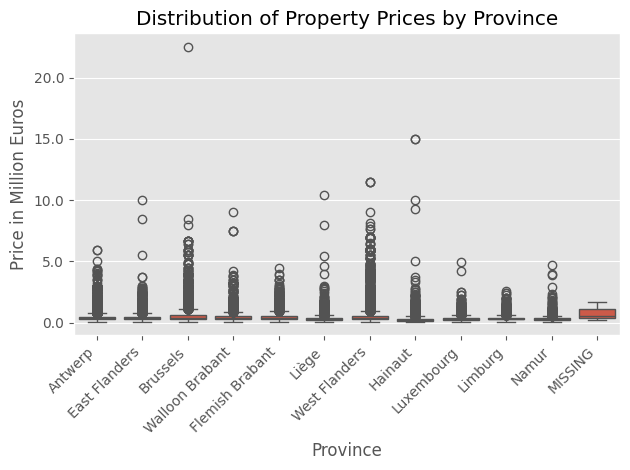

In [7]:
# Ensure that 'Price' is in numeric format
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='province', y='price', data=df)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [10]:
#remove outliers for price
df = df[df['price'] < 10000000]

# after removing price outliers
print("Number of observations (rows):", df.shape[0])
print("Number of features (columns):", df.shape[1])

Number of observations (rows): 75504
Number of features (columns): 30


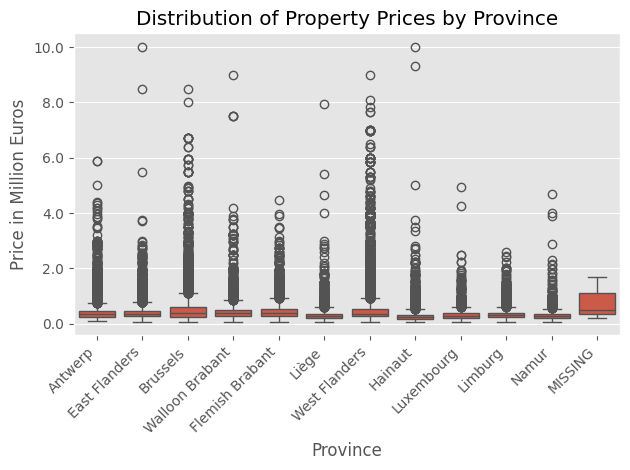

In [11]:
# Ensure that 'Price' is in numeric format
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='province', y='price', data=df)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

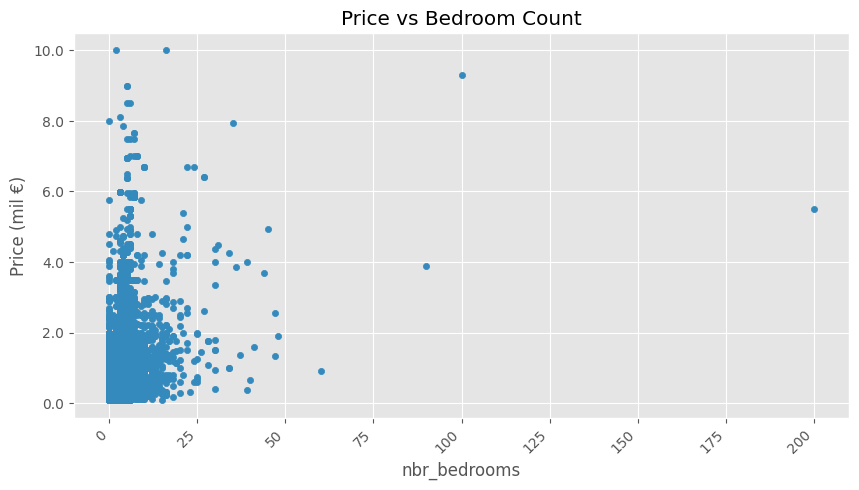

918

In [28]:
# bedroom count

# Price versus Bedroom count scatter plot
ax = df.plot(kind='scatter',
             x='nbr_bedrooms', y='price', figsize=(10, 5), title='Price vs Bedroom Count')

plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Price (mil €)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()


# # calculate outliers for bedroom count
# Q1 = df['nbr_bedrooms'].quantile(0.25)
# Q3 = df['nbr_bedrooms'].quantile(0.75)
# IQR = Q3 - Q1
# outliers = df[(df['nbr_bedrooms'] < (Q1 - 1.5 * IQR)) | (df['nbr_bedrooms'] > (Q3 + 1.5 * IQR))].shape[0]
# outliers

In [29]:
#remove outliers for bedroom count
df = df[df['nbr_bedrooms'] < 8]

#print shape after removing outliers
print("Number of observations (rows):", df.shape[0])


Number of observations (rows): 74586


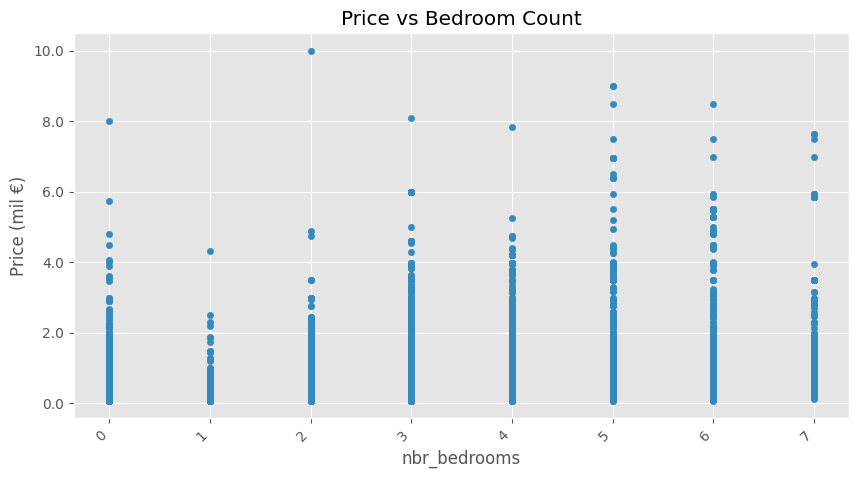

In [30]:
# replotting the scatter plot after removing bedroom outliers
# Price versus Bedroom count scatter plot
ax = df.plot(kind='scatter',
             x='nbr_bedrooms', y='price', figsize=(10, 5), title='Price vs Bedroom Count')

plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Price (mil €)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()

In [31]:
# calculate correlation between price and bedroom count
correlation = df['price'].corr(df['nbr_bedrooms'])
correlation

0.30472569482438333

In [33]:
df.head(5)

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,100.0,NaN,2.0,2.0,INSTALLED,0,0,1,5.0,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,NaN,NaN,680.0,NaN,2.0,MISSING,0,0,0,0.0,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,NaN,142.0,NaN,2.0,3.0,INSTALLED,0,0,1,NaN,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,2024.0,187.0,505.0,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,2022.0,169.0,NaN,2.0,2.0,HYPER_EQUIPPED,0,0,1,20.0,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


Text(0.5, 0, 'Living Area in m²')

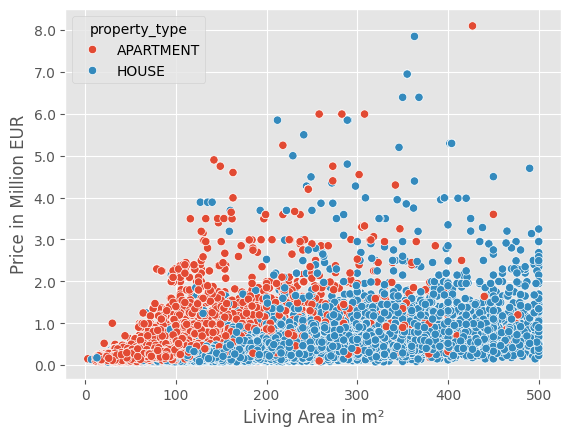

In [44]:
#df[df['total_area_sqm'] > 500].shape[0]
# living area
# remove outliers for LivingArea, remove all rows with LivingArea > 500
df = df[df['total_area_sqm'] <= 500]

sns.scatterplot(data=df,
                x='total_area_sqm',
                y='price',
                hue='property_type')

#format y-axis to show price in million EUR instead of scientific notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

#set y label and x label
plt.ylabel('Price in Million EUR')
plt.xlabel('Living Area in m²')

In [51]:
# find the rows with total_area_sqm > 400 and price > 3000000 and proeprty_type is 'Apartment'
df[(df['total_area_sqm'] > 400) & (df['price'] > 3000000) & (df['property_type'] == 'Apartment')].shape[0]

0

In [45]:
#calculate corelation between price and total_area_sqm
correlation = df['price'].corr(df['total_area_sqm'])
correlation

0.4388137419896804

In [46]:
df.head(5)

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,100.0,NaN,2.0,2.0,INSTALLED,0,0,1,5.0,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,NaN,142.0,NaN,2.0,3.0,INSTALLED,0,0,1,NaN,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,2024.0,187.0,505.0,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,2022.0,169.0,NaN,2.0,2.0,HYPER_EQUIPPED,0,0,1,20.0,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN
5,22183000,548514.0,HOUSE,HOUSE,Flanders,Flemish Brabant,Halle-Vilvoorde,1700,NaN,NaN,NaN,187.0,710.0,4.0,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN


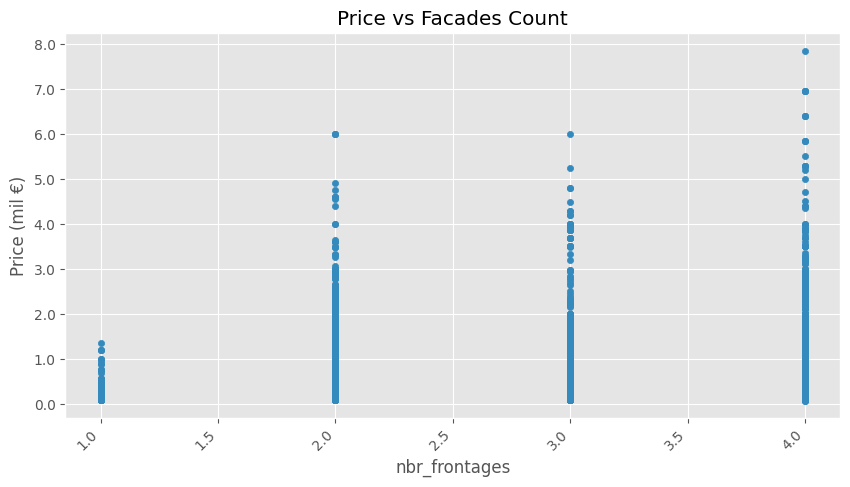

In [76]:
# nbr_frontages
# display how many observations have > 4 facades
df[df['nbr_frontages'] > 4].shape[0]

# remove outliers for nbr_frontages, remove all rows with nbr_frontages > 4
df = df[df['nbr_frontages'] <= 4]

ax = df.plot(kind='scatter',
             x='nbr_frontages', y='price', figsize=(10, 5), title='Price vs Facades Count')

plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Price (mil €)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()


In [77]:
#dtype for nbr_frontages
df['nbr_frontages'].dtype

#convert nbr_frontages to int
df.loc[:, 'nbr_frontages'] = df['nbr_frontages'].astype(int)


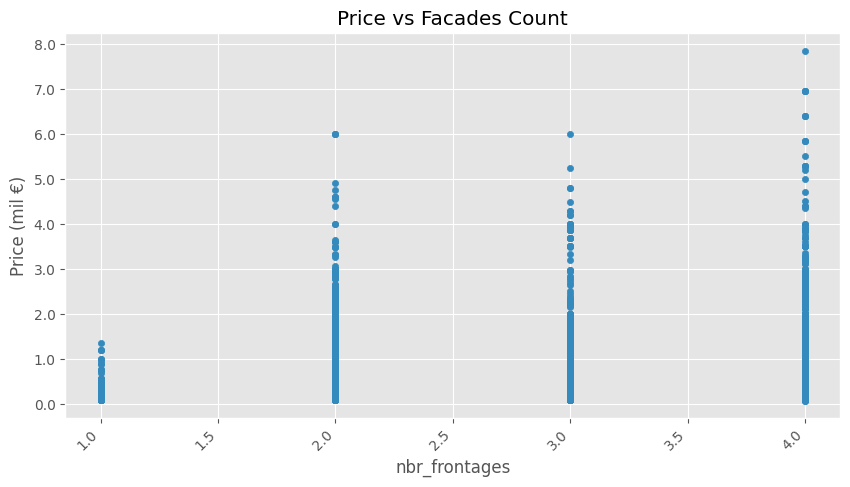

In [78]:
ax = df.plot(kind='scatter',
             x='nbr_frontages', y='price', figsize=(10, 5), title='Price vs Facades Count')

plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Price (mil €)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()

In [79]:
# calculate correlation between price and nbr_frontages
correlation = df['price'].corr(df['nbr_frontages'])
correlation

0.15375416800797861

In [80]:
df.head(5)


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,100.0,NaN,2,2.0,INSTALLED,0,0,1,5.0,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,NaN,142.0,NaN,2,3.0,INSTALLED,0,0,1,NaN,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,2022.0,169.0,NaN,2,2.0,HYPER_EQUIPPED,0,0,1,20.0,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN
5,22183000,548514.0,HOUSE,HOUSE,Flanders,Flemish Brabant,Halle-Vilvoorde,1700,NaN,NaN,NaN,187.0,710.0,4,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN
10,28322000,385000.0,HOUSE,HOUSE,Flanders,East Flanders,Sint-Niklaas,9190,51.206244,4.075700,NaN,309.0,309.0,3,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN


In [90]:
# # calculate correlation between price and construction year
# correlation = df['price'].corr(df['construction_year'])
# correlation #0.04 - weak correlation

# # calculate correlation between price and swimming pool
# correlation = df['price'].corr(df['fl_swimming_pool'])
# correlation

# # calculate correlation between price and terrace
# correlation = df['price'].corr(df['fl_terrace'])
# correlation

correlation = df['fl_swimming_pool'].corr(df['nbr_frontages'])
correlation

0.14658731736745417

In [91]:
df.head(5)

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,100.0,NaN,2,2.0,INSTALLED,0,0,1,5.0,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,NaN,142.0,NaN,2,3.0,INSTALLED,0,0,1,NaN,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,2022.0,169.0,NaN,2,2.0,HYPER_EQUIPPED,0,0,1,20.0,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN
5,22183000,548514.0,HOUSE,HOUSE,Flanders,Flemish Brabant,Halle-Vilvoorde,1700,NaN,NaN,NaN,187.0,710.0,4,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN
10,28322000,385000.0,HOUSE,HOUSE,Flanders,East Flanders,Sint-Niklaas,9190,51.206244,4.075700,NaN,309.0,309.0,3,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN


In [92]:
#show column names
df.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

In [127]:
# check & display duplicate rows based on 'id' column
# print how many rows are duplicates based on ID
print(df.columns)
#print("Number of duplicate rows based on ID:", df.duplicated(['id']).sum())
# df[df.duplicated(['id'])]


Index(['price', 'property_type', 'region', 'province', 'livingarea_sqm',
       'facades_count', 'bedrooms_count'],
      dtype='object')


In [128]:
# remove custom columns: 'ID', 'zip'
df = df[[#'id',
         'price', 'property_type',
         #'subproperty_type',
         'region', 'province',
         # 'locality',
         #'zip_code', 'latitude', 'longitude',
       # 'construction_year',
       'total_area_sqm',
       # 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms',
       #'equipped_kitchen', 'fl_furnished',
       #'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       #'fl_swimming_pool', 'fl_floodzone', 'state_building',
       #'primary_energy_consumption_sqm',
       #'epc',
       # 'heating_type',
       #'fl_double_glazing', 'cadastral_income'
       ]].copy()

# df.shape

KeyError: "['total_area_sqm', 'nbr_frontages', 'nbr_bedrooms'] not in index"

In [126]:
df.head(5)


,price,property_type,region,province,livingarea_sqm,facades_count,bedrooms_count
0,225000.0,APARTMENT,Flanders,Antwerp,100.0,2,2.0
2,335000.0,APARTMENT,Brussels,Brussels,142.0,2,3.0
4,982700.0,APARTMENT,Wallonia,Walloon Brabant,169.0,2,2.0
5,548514.0,HOUSE,Flanders,Flemish Brabant,187.0,4,3.0
10,385000.0,HOUSE,Flanders,East Flanders,309.0,3,3.0


In [114]:
# rename columns
df.rename(columns={'total_area_sqm': 'livingarea_sqm',
                   'nbr_frontages': 'facades_count',
                   'nbr_bedrooms': 'bedrooms_count'
                   }, inplace=True)

In [116]:
# replace all values "Brussels-Capital" in column 'region' with "Brussels"
df['region'] = df['region'].replace('Brussels-Capital', 'Brussels')

In [117]:
df.head(5)

,price,property_type,region,province,livingarea_sqm,facades_count,bedrooms_count
0,225000.0,APARTMENT,Flanders,Antwerp,100.0,2,2.0
2,335000.0,APARTMENT,Brussels,Brussels,142.0,2,3.0
4,982700.0,APARTMENT,Wallonia,Walloon Brabant,169.0,2,2.0
5,548514.0,HOUSE,Flanders,Flemish Brabant,187.0,4,3.0
10,385000.0,HOUSE,Flanders,East Flanders,309.0,3,3.0


In [118]:
# print shape
print("Number of observations (rows):", df.shape[0])
print("Number of features (columns):", df.shape[1])


Number of observations (rows): 43251
Number of features (columns): 7


Text(0.5, 0, 'Living Area in m²')

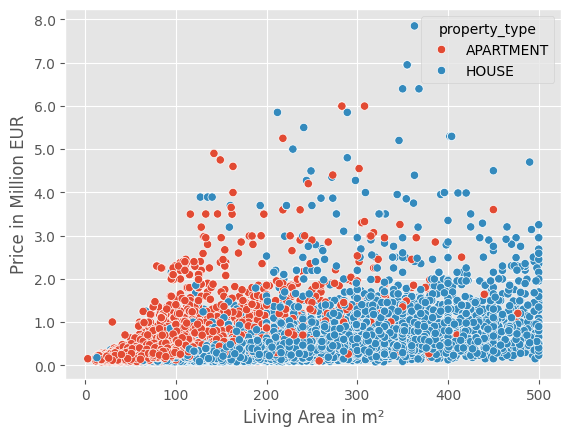

In [120]:
sns.scatterplot(data=df,
                x='livingarea_sqm',
                y='price',
                hue='property_type')

#format y-axis to show price in million EUR instead of scientific notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

#set y label and x label
plt.ylabel('Price in Million EUR')
plt.xlabel('Living Area in m²')

In [121]:
#calculate corelation between price and livingarea_sqm
correlation = df['price'].corr(df['livingarea_sqm'])
correlation

0.44628370086118757

In [122]:
#calculate correlation between price and bedrooms_count
correlation = df['price'].corr(df['bedrooms_count'])
correlation

0.3085503481055091

In [129]:
# identiy and print categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns


Index(['property_type', 'region', 'province'], dtype='object')

In [130]:
# identify and print numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['price', 'livingarea_sqm', 'facades_count', 'bedrooms_count'], dtype='object')